In [1]:
!nvidia-smi

Fri Jan  6 00:21:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [ ]:
!pip3 install openmim
!mim install mmcv-full

### Step 2. Install MMDetection from the source.

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

### Step 3. Verification

In [2]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.27.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [ ]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

## [Pascal VOC 2007 Dataset](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/index.html)
- Download the training/validation data (450MB tar file)

In [7]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null 2>&1

--2023-01-06 00:22:04--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  14.8MB/s    in 32s     

2023-01-06 00:22:36 (13.8 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



### Pascal VOC 2007 Dataset의 디렉토리 구조 보기

In [ ]:
# Check the directory structure of the Oxford Pet

# Install tree first
!apt-get -q install tree

In [ ]:
!tree ./VOCdevkit/VOC2007

### MS-COCO 포맷으로 변환하기

* MMDetection은 Mask RCNN을 학습하기 위해서는 COCO 포맷을 가장 선호
* CocoDataset으로 지정해야만, evaluation 시 mask evaluation 정보 제공.(2023년 1월 기준) https://mmdetection.readthedocs.io/en/latest/tutorials/customize_dataset.html

```
Note

For instance segmentation datasets, MMDetection only supports evaluating mask AP of dataset in COCO format for now.

It is recommended to convert the data offline before training, thus you can still use CocoDataset and only need to modify the path of annotations and the training classes.
```

* Pascal voc 포맷을 Coco 포맷으로 변환할 수 있는 유틸리티를 활용하여 데이터 변환
https://github.com/ISSResearch/Dataset-Converters
* Dataset converter 패키지가 opencv를 3.4로 downgrade함에 유의

In [8]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
!git clone https://github.com/ISSResearch/Dataset-Converters.git

In [ ]:
# %cd 디렉토리 (현재 변경된 디렉토리 안에 있음)
# !cd 디렉토리 (현재 라인에서만 디렉토리가 변경되고, 실행후에는 이전 디렉토리로 복귀)

In [ ]:
!cd Dataset-Converters; pip install -r requirements.txt

In [1]:
# 런타임 다시 시작후 버전 확인
import cv2
cv2.__version__

'3.4.18'

In [4]:
%cd mmdetection

/content/mmdetection


In [5]:
!mkdir ./coco_output

In [6]:
!cd Dataset-Converters; python convert.py --input-folder ../VOCdevkit/VOC2007 --output-folder ../coco_output \
                  --input-format VOCSEGM --output-format COCO --copy

In [ ]:
# opencv 원래 버전으로 복귀
!pip install opencv-python==4.6.0.66

In [1]:
import cv2
cv2.__version__

'4.6.0'

In [3]:
%cd mmdetection

/content/mmdetection


MS-COCO 포맷으로 변환된 json 파일 확인하기

In [ ]:
# http://json.parser.online.fr/ (사이트에서 변환)
!sudo apt-get install jq

In [5]:
!jq . ./coco_output/annotations/val.json > output.json

In [ ]:
!head -100 output.json

In [ ]:
!tail -200 output.json

In [9]:
!grep -n 'annotations' output.json

1283:  "annotations": [


In [ ]:
# 1100 ~ 1500
!head -1500 output.json | tail -400 

### 이미지와 레이블 보기

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


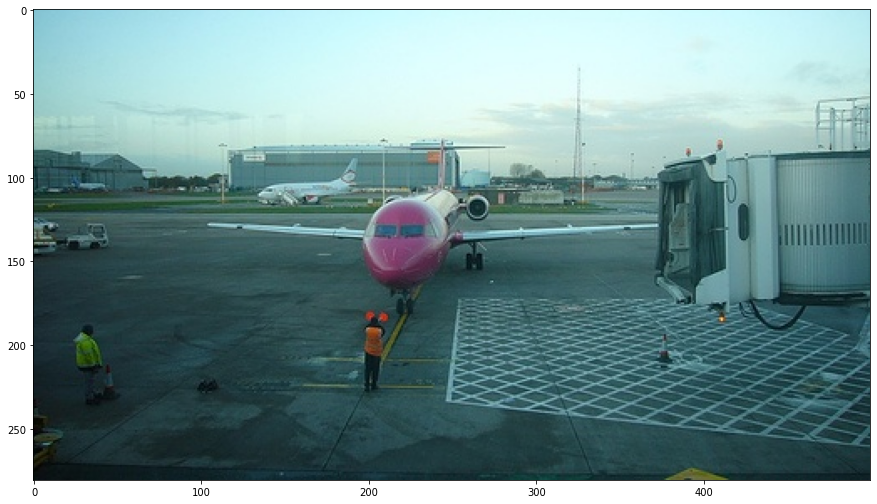

In [11]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./coco_output/train/000032.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### pycocotools를 이용한 COCO 데이터 액세스
* pycocotools 사용 방법은 아래 github 참조 https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 

In [12]:
dataDir='./coco_output'
dataType='train'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)
print(annFile)

./coco_output/annotations/train.json


**COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기**

In [13]:
# annotation 파일을 COCO객체로 로드하면 다양한 COCO객체의 API들을 이용하여 COCO DATASET 활용 가능
from pycocotools.coco import COCO

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


**Cagory 정보 가져 오기**

In [14]:
# getCatIds()는 COCO Dataset의 category id를 리스트로 반환
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [15]:
# loadCats()는 category id 리스트를 입력받아 category들에 대한 세부 정보를 여러개의 딕셔너리를 개별 원소를 가지는 리스트로 반환
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'},
 {'supercategory': 'none', 'id': 6, 'name': 'bus'},
 {'supercategory': 'none', 'id': 7, 'name': 'car'},
 {'supercategory': 'none', 'id': 8, 'name': 'cat'},
 {'supercategory': 'none', 'id': 9, 'name': 'chair'},
 {'supercategory': 'none', 'id': 10, 'name': 'cow'},
 {'supercategory': 'none', 'id': 11, 'name': 'diningtable'},
 {'supercategory': 'none', 'id': 12, 'name': 'dog'},
 {'supercategory': 'none', 'id': 13, 'name': 'horse'},
 {'supercategory': 'none', 'id': 14, 'name': 'motorbike'},
 {'supercategory': 'none', 'id': 15, 'name': 'person'},
 {'supercategory': 'none', 'id': 16, 'name': 'pottedplant'},
 {'supercategory': 'none', 'id': 17, 'name': 'sheep'},
 {'supercategory': 'none', 'id': 18, 'name': 'sofa'},
 {'super

**지정된 이미지를 데이터 세트에서 로드하기**

In [26]:
catIds = coco.getCatIds(catNms=['horse']);
print(catIds)
# coco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[13]
[36, 101, 167, 106, 138, 127, 206, 175, 80, 188, 19, 25, 155, 28, 95]


In [27]:
#loadImgs()는 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 반환
img = coco.loadImgs(36)
print(img)

[{'file_name': '001960.jpg', 'height': 500, 'width': 329, 'id': 36}]


In [28]:
# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 추출 
print("\n내부 딕셔너리 파일 메타정보 추출")
img = coco.loadImgs(36)[0]
print(img)


내부 딕셔너리 파일 메타정보 추출
{'file_name': '001960.jpg', 'height': 500, 'width': 329, 'id': 36}


**COCO 이미지를 경로 만들어서 시각화**

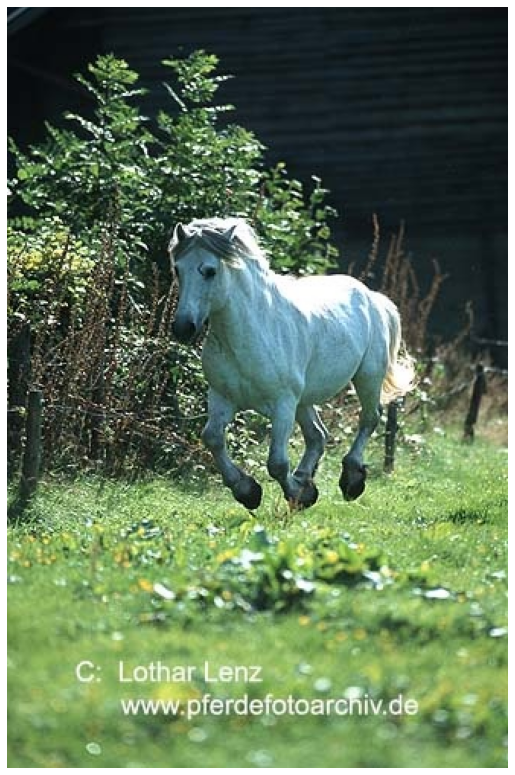

In [29]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = './coco_output/train/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 14))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화 (COCO API 활용)
* getAnnIds()로 특정 image에 해당하는 annotation id를 가져온 후에 이 id를 loadAnns()로 입력하여 해당 이미지의 모든 annotation 정보를 가져옴. 
* segmentation 정보는 polygon 형태로 되어 있음. 
* annotation 정보를 coco.showAnns(anns)에 입력하여 instance segmentation 시각화 수행.

In [30]:
img

{'file_name': '001960.jpg', 'height': 500, 'width': 329, 'id': 36}

In [31]:
# 해당 image의 annotation을 가져오기 위해서 getAnnIds() 를 이용함. 인자로 image의 id(파일명이 아님)와 category id를 입력
# 하나의 image는 segmentation별로 여러개의 annotation을 가질 수 있음
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[132]

In [32]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함. 
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[130,
    141,
    129,
    142,
    123,
    142,
    116,
    149,
    114,
    147,
    114,
    146,
    113,
    145,
    113,
    147,
    114,
    148,
    114,
    154,
    110,
    158,
    109,
    158,
    109,
    161,
    110,
    162,
    110,
    165,
    111,
    166,
    111,
    168,
    112,
    169,
    112,
    172,
    113,
    173,
    113,
    177,
    114,
    178,
    114,
    180,
    113,
    181,
    113,
    185,
    114,
    186,
    114,
    194,
    113,
    195,
    113,
    197,
    112,
    198,
    112,
    201,
    111,
    202,
    111,
    207,
    110,
    208,
    110,
    213,
    114,
    217,
    115,
    217,
    116,
    218,
    119,
    218,
    122,
    215,
    122,
    214,
    126,
    210,
    126,
    209,
    127,
    208,
    127,
    207,
    128,
    206,
    128,
    205,
    132,
    201,
    133,
    201,
    134,
    202,
    134,
    205,
    135,
    206,
    135,
    209,
    134,
    210,
    134,
   

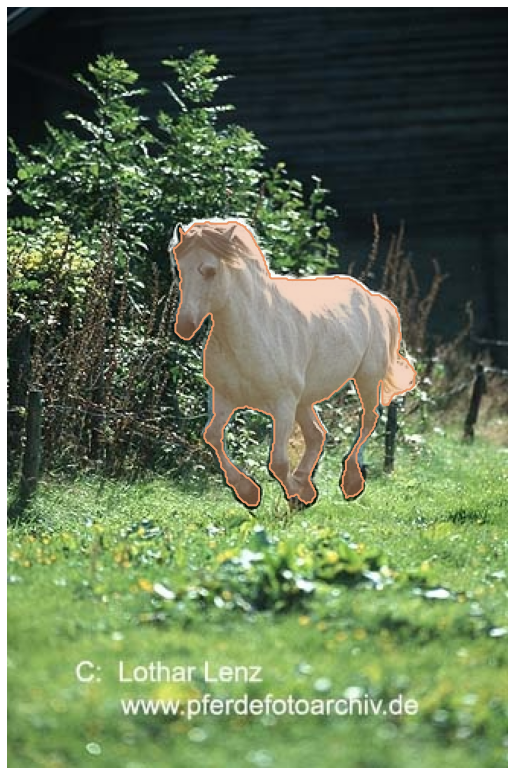

In [33]:
# showAnns( )는 annotation 정보들을 입력 받아서 Visualization 시켜줌. 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함. 
plt.figure(figsize=(12, 14))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)